In [1]:
from keras.models import model_from_json
from experiments.lstm_train_fcn import SequenceGenerator
from utils.networks import class_net_fcn_2p_lstm

/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
network = class_net_fcn_2p_lstm
model = network([None, 96, 108, 1])

/home/pelonomi/Documents/ConvLSTM/utils/networks.py:145: UserWarning: Update your `ConvLSTM2D` call to the Keras 2 API: `ConvLSTM2D(kernel_size=(3, 3), padding="same", filters=12, return_sequences=True)`
  x = ConvLSTM2D(nb_filter=c, nb_row=3, nb_col=3, border_mode='same', return_sequences=True)(input_img)


Instructions for updating:
keep_dims is deprecated, use keepdims instead


/home/pelonomi/Documents/ConvLSTM/utils/networks.py:146: UserWarning: Update your `ConvLSTM2D` call to the Keras 2 API: `ConvLSTM2D(kernel_size=(3, 3), padding="same", filters=12, return_sequences=True)`
  x = ConvLSTM2D(nb_filter=c, nb_row=3, nb_col=3, border_mode='same', return_sequences=True)(x)
/home/pelonomi/Documents/ConvLSTM/utils/networks.py:147: UserWarning: Update your `ConvLSTM2D` call to the Keras 2 API: `ConvLSTM2D(kernel_size=(3, 3), padding="same", filters=12, return_sequences=True)`
  c1 = ConvLSTM2D(nb_filter=c, nb_row=3, nb_col=3, border_mode='same', return_sequences=True)(x)
/home/pelonomi/Documents/ConvLSTM/utils/networks.py:151: UserWarning: Update your `ConvLSTM2D` call to the Keras 2 API: `ConvLSTM2D(kernel_size=(3, 3), padding="same", filters=24, return_sequences=True)`
  x = ConvLSTM2D(nb_filter=2 * c, nb_row=3, nb_col=3, border_mode='same', return_sequences=True)(x)
/home/pelonomi/Documents/ConvLSTM/utils/networks.py:152: UserWarning: Update your `ConvLSTM2D` 

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [5]:
sequences_test = ['/home/pelonomi/Documents/ConvLSTM/Data/substack500_7fps_2.avi']
val = SequenceGenerator(sequences_test, seq_length=20, seq_per_seq=1, step=10)
v = val.generate_batch(1)

/home/pelonomi/Documents/ConvLSTM/Data/substack500_7fps_2.avi


/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Number of elements: 

1


In [6]:
res = model.predict_generator(v, steps=1)

In [7]:
res.shape

(1, 20, 384, 432, 1)

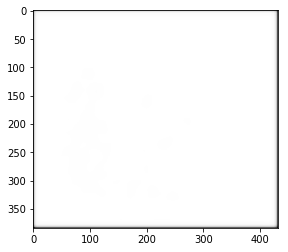

0 1


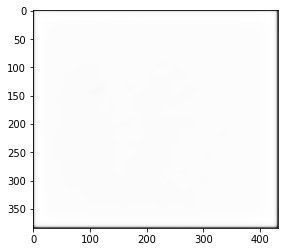

0 2


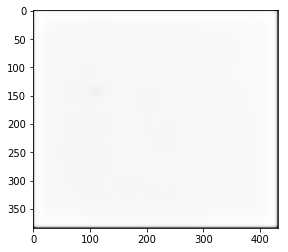

0 3


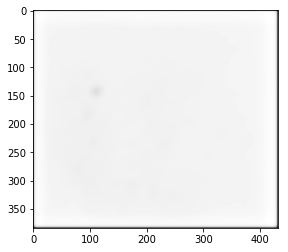

0 4


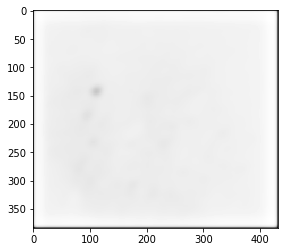

0 5


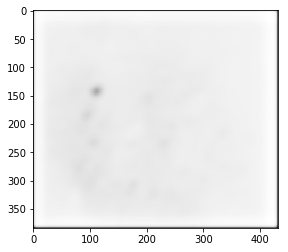

0 6


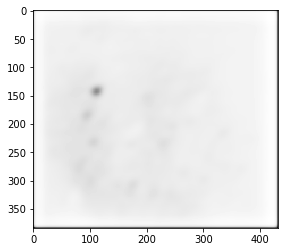

0 7


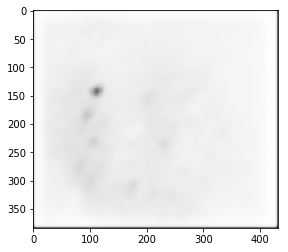

0 8


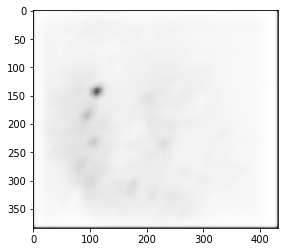

0 9


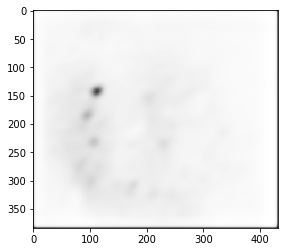

0 10


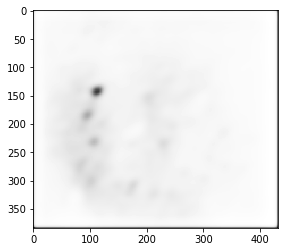

0 11


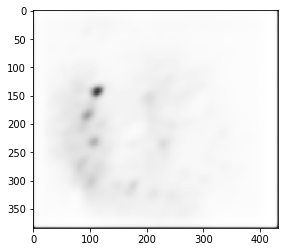

0 12


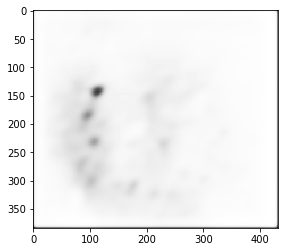

0 13


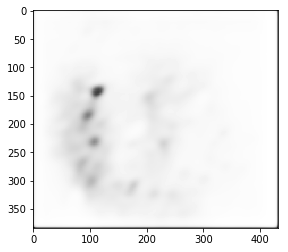

0 14


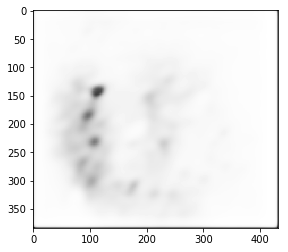

0 15


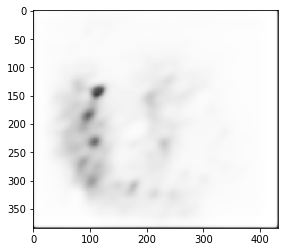

0 16


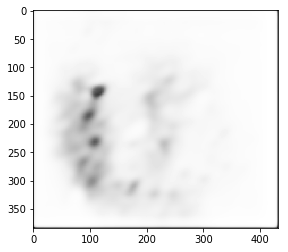

0 17


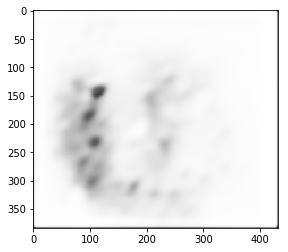

0 18


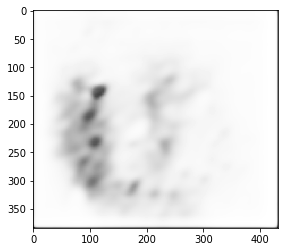

0 19


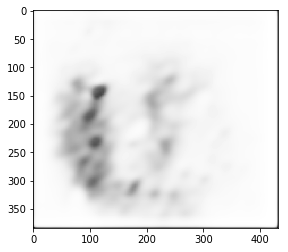

0 20


In [8]:
#1d imaging
item_count = 0
image_count = 0
for item in res:
    for image in item:
        x = len(image)
        y = len(image[0])
        img = np.zeros((x, y))
        for row in range(x):
            for col in range(y):
                img[row,col] = image[row][col][0]
       
        plt.imshow(img, cmap = 'gray')
        plt.show()
        image_count +=1
        print(item_count,image_count)
    item_count +=1
    

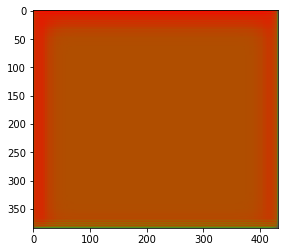

0 1


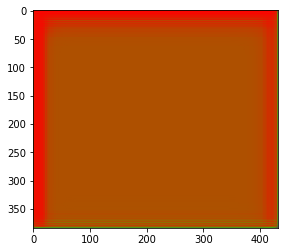

0 2


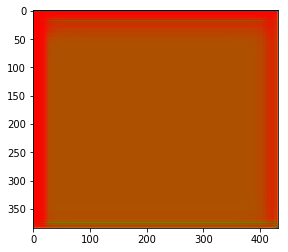

0 3


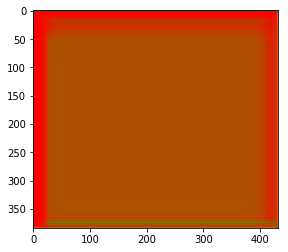

0 4


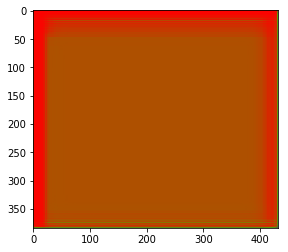

0 5


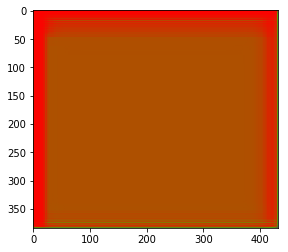

0 6


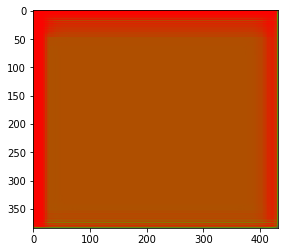

0 7


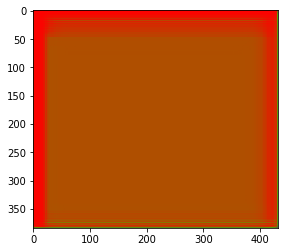

0 8


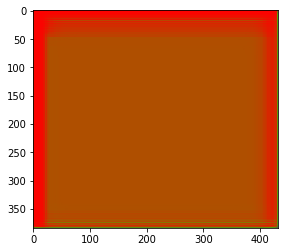

0 9


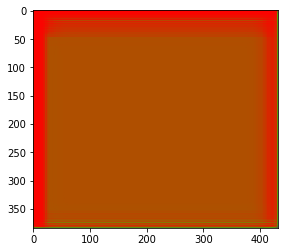

0 10


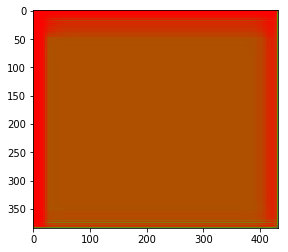

0 11


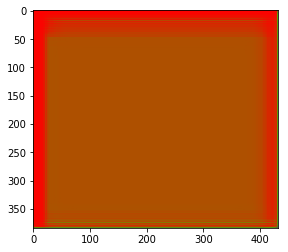

0 12


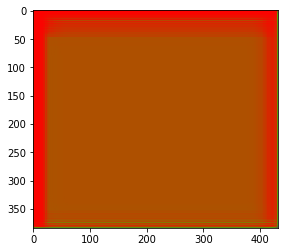

0 13


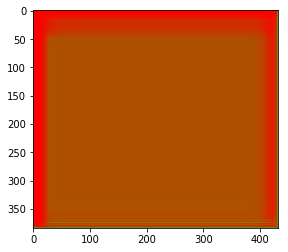

0 14


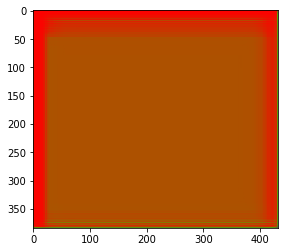

0 15


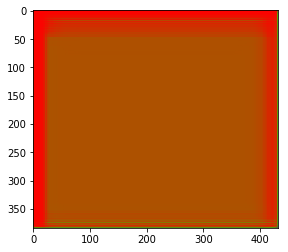

0 16


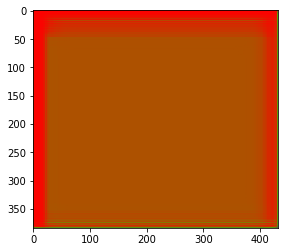

0 17


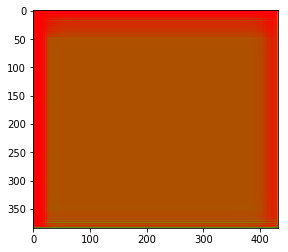

0 18


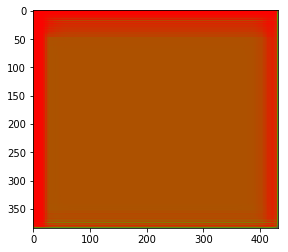

0 19


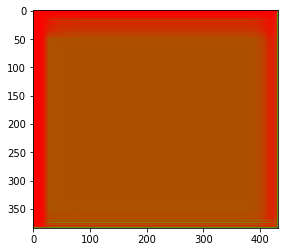

0 20


In [8]:
item_count = 0
image_count = 0
for item in res:
    for image in item:
        plt.imshow(image, cmap = 'gray')
        plt.show()
        image_count +=1
        print(item_count,image_count)
    item_count +=1